#### Setup Modules

In [1]:
# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from matplotlib import rcParams
%matplotlib inline
rcParams.update({'font.size': 15, 'text.usetex': True})

In [3]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

In [4]:
# make qutip available in the rest of the notebook
from qutip import *

In [5]:
from datetime import datetime

### Helper Functions for plots

In [6]:
global X_list, Y_list, Z_list
X_list, Y_list, Z_list = [], [], []

In [7]:
def generate_maps(X, Y, Z):
    X_list.append(X); Y_list.append(Y); Z_list.append(Z)
    fig = plt.figure(figsize=(14,5))

    axes = []
    axes.append(fig.add_axes([0.1, 0.1, 0.4, 1], projection='3d'))
    p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,
                             linewidth=0, antialiased=False, vmin=0, vmax=1)
    axes[0].set_xlabel(r'$m$')
    axes[0].set_ylabel(r'$\omega T /2\pi$')

    axes.append(fig.add_axes([0.55, 0.1, 0.35, 0.8]))
    p = axes[1].pcolor(X, Y, Z, cmap=cm.RdBu, vmin=0, vmax=1)
    cb = fig.colorbar(p, ax=axes[1])
    axes[1].set_xlabel(r'$m$')
    axes[1].set_xlim([1, M])
    axes[1].set_ylabel(r'$\omega T /2\pi$');
    axes.append(ax)
    
    print("Figure index =", len(X_list), "Time :", str(datetime.now()))

# Introduction

For a given set of bounded operators $\left\{\hat{A}_{j}:1\le j \le p\right\}$ which not necessarily commute with each other, the following relation

$$
e^{\hat{A}_1+\hat{A}_2 + \cdots \hat{A}_{p}} = \lim_{m \rightarrow \infty} \left(e^{\hat{A}_1/m} e^{\hat{A}_2/m} \cdots e^{\hat{A}_{p}/m}\right)^m
$$

is satisfied with the correction of $m^{-1}$. This equation, also known as the <i>generalized Trotter's formula</i> [<a href="http://link.springer.com/10.1007/BF01609348">1</a>, <a href="http://www.ams.org/jourcgi/jour-getitem?pii=S0002-9939-1959-0108732-6">2</a>], has been used as a key method of employing Monte Carlo simulation for quantum systems. We apply this formula to the time-evolution of a quantum system under total Hamiltonian for different values of positive integers $m$.

That is, we seek to find the way of treating the time-evolution of a system under total Hamiltonian $\hat{H} = \hat{H}_0 + \hat{H}_1 + \cdots + \hat{H}_{p-1}$ as applying short pulsed sequences of decomposed Hamiltonians $\hat{H}_{j}$ in a specific order. To do so, we define the time-evolution operator $\hat{U}$ and its approximant $\hat{\mathscr{U}}_m$ for an integer $m$ as
$$
\hat{U}(T) = e^{-i(\hat{H}_0 + \hat{H}_1 + \cdots + \hat{H}_{p-1})T/\hbar},
$$ $$
\hat{\mathscr{U}}_m(T) = (e^{-i \hat{H}_0 T/m\hbar} e^{-i \hat{H}_1 T/m\hbar} \cdots e^{-i \hat{H}_{p-1} T/m\hbar})^m,
$$
where $T$ is the total evolution time. It is clear from the generalized Trotter's formula that $\hat{U}(T) = \lim_{m\rightarrow\infty} \hat{\mathscr{U}}_m (T)$. From now on, we call $m$ as the <i>fragmentation number</i>.

To quantify the error of this approximation, it is natural to investigate the overlap between two final states $\hat{U}(T) |i \rangle$ and $\hat{\mathscr{U}}_m (T)|i\rangle$, which are the states obtained by time-evolution and the corresponding approximated time-evolution. If the approximation holds, the overlap $\left|\langle i | \hat{\mathscr{U}}_m^\dagger U | i \rangle\right|$between the two aforementioned states, also known as the <i>fidelity</i> [3], would be close to 1.

# Rabi Model

As the simplest example, we consider the <i>Rabi model</i>, which describes an interaction of a two-level atom and a quantized mode of an optical cavity. The Hamiltonian takes the form:
$$
\hat{H} = \frac{1}{2} \hbar \Omega \hat{\sigma}_z + \hbar \omega \hat{a}^\dagger \hat{a} + \hbar g (\hat{\sigma}_+ + \hat{\sigma}_-) (\hat{a}^\dagger + \hat{a})
$$
Here, $\hat{\sigma}_z = \left| e \right>\left< e \right|-\left| g \right>\left< g \right|$ where $\left|e\right>$ and $\left|g\right>$ are the excited and the ground states of the two-level atom, respectively. This model is different from the <i>Jaynes-Cummings model</i> in which we neglect the counter-rotating terms $\hat{\sigma}_+ \hat{a}^\dagger$ and $\hat{\sigma}_- \hat{a}$.

## Decomposition into two parts

We first decompose the total Hamiltonian into two parts: 

$$
\hat{H}_0 = \frac{1}{2}\hbar \Omega \hat{\sigma}_z + \hbar g (\hat{\sigma}_+ \hat{a}^\dagger + \hat{\sigma}_- \hat{a}),\quad \hat{H}_1 = \hbar \omega \hat{a}^\dagger \hat{a} + \hbar g (\hat{\sigma}_+ \hat{a} + \hat{\sigma}_- \hat{a}^\dagger).
$$

It is clear that the two Hamiltonians $H_0$ and $H_1$ does not commute, so that we CANNOT claim that $\hat{U} =  \hat{\mathscr{U}}_m$.

We consider the resonant case where $\Omega =\omega = 20 g$. Suppose that the atom is initially in the excited state, while there is no cavity photon existent in the beginning. $|i\rangle \equiv |0, e\rangle$

In [8]:
N = 15         # number of cavity fock states

# intial state
psi0 = tensor(basis(N,0), basis(2,0))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2))
sp, sm = tensor(qeye(N), sigmap()), tensor(qeye(N), sigmam())
sx, sy, sz = tensor(qeye(N), sigmax()), tensor(qeye(N), sigmay()), tensor(qeye(N), sigmaz())

In [9]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into two parts:
H_list = [wc * a.dag() * a + g * (a.dag() * sm.dag() + a * sm),
          0.5 * wa * sz + g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [10]:
def U(H, T):
    # normal time-evolution
    return (-1j * H * T).expm()

def U_a(H_list, T, m):
    # time-evolution approximant
    mult = 1
    for idx in range(len(H_list)):
        mult = mult * (-1j * H_list[idx] * T / m).expm()
    return mult ** m

Here, <tt>U(H, T)</tt> and <tt>U_a(H_list, T, m)</tt> correspond to the normal time-evolution carried out by the total Hamiltonian and the time-evolution approximant from obtained from the Trotter's formula, respectively.

In [11]:
M = 50   # maximum fragmentation number
m_list = range(1, M+1)

In [12]:
TT = 12     # maximum value of the total evolution time
dT = 2     # time step

T_list = np.arange(1e-4, TT, dT)

In [13]:
overlap = np.zeros((len(m_list), len(T_list)))

for i1, m in enumerate(m_list):
    for i2, T in enumerate(T_list):
        overlap[i1, i2] = fidelity(U_a(H_list, T, m) * psi0,
                                   U(H, T) * psi0)

#### Fidelity as a function of fragmentation number $m$ for different values of $\omega T/2\pi$

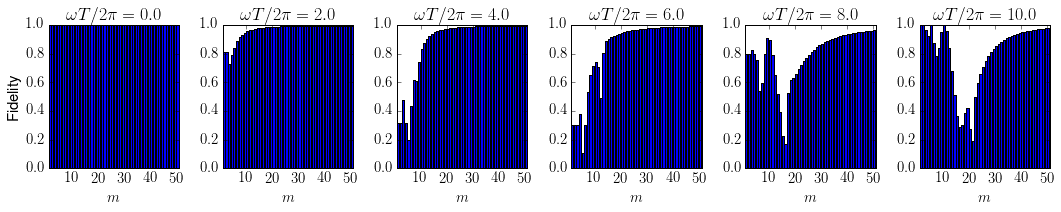

In [14]:
fig, ax = plt.subplots(1, len(T_list), figsize = (2.5 * len(T_list), 3.2))

for idx, T in enumerate(T_list):
    ax[idx].bar(m_list, overlap[:, idx])
    ax[idx].set_xlim([1, M + 1])
    ax[idx].set_ylim([0, 1])
    ax[idx].set_xlabel('$m$')
    ax[idx].set_title(r'$\omega T/2\pi = %.1f$' % T);
ax[0].set_ylabel('Fidelity')
fig.tight_layout();

In [15]:
TT = 25       # maximum value of the total evolution time
dT = 5e-2     # time step

T_list = np.arange(1e-4, TT, dT)

In [16]:
X, Y = np.meshgrid(m_list, T_list)
Z = np.zeros((len(T_list), len(m_list)))

for i1, m in enumerate(m_list):
    for i2, T in enumerate(T_list):
        rho_af = U_a(H_list, T, m) * psi0
        rho_0f = U(H, T) * psi0
        Z[i2, i1] = fidelity(rho_af, rho_0f)

Figure index = 1 Time : 2015-07-23 14:15:16.261820


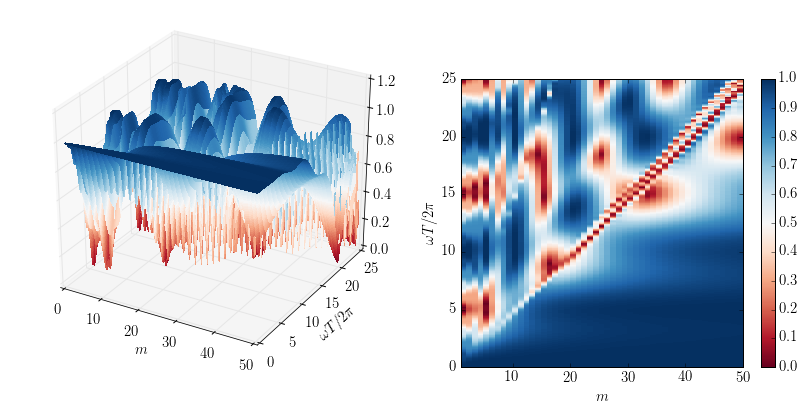

In [17]:
generate_maps(X, Y, Z)

From the plot obtained above, the values of fidelity along the straight line starting off from the origin (or, constant $\omega T/2\pi m$) shows similar behavior. It seems that the fidelity as a function of $\omega T/2\pi m$, which corresponds to coarseness in time, is an important factor.

In [18]:
T_m_list = np.arange(0, 2, 1e-2)

X, Y = np.meshgrid(m_list, T_m_list)
Z = np.zeros((len(T_m_list), len(m_list)))

for i1, m in enumerate(m_list):
    for i2, T_m in enumerate(T_m_list):
        T = m * T_m
        rho_af = U_a(H_list, T, m) * psi0
        rho_0f = U(H, T) * psi0
        Z[i2, i1] = fidelity(rho_af, rho_0f)

Figure index = 2 Time : 2015-07-23 14:20:34.339981


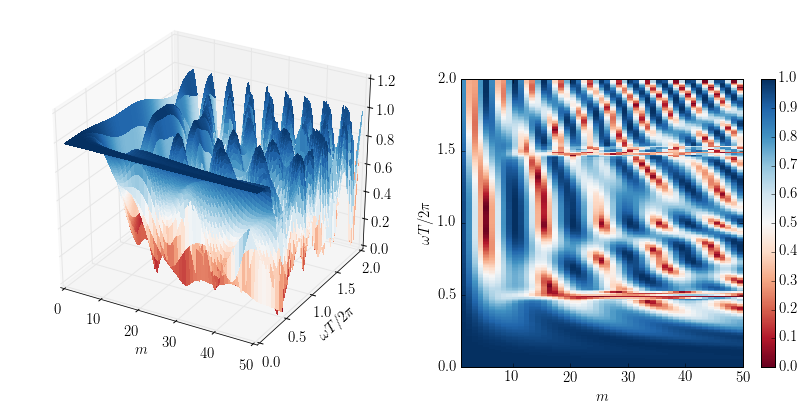

In [19]:
generate_maps(X, Y, Z)

### Changing the order of Hamiltonian sequences

In [20]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into two parts:
H_list = [wc * a.dag() * a + g * (a.dag() * sm.dag() + a * sm),
          0.5 * wa * sz + g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

We reverse the order in applying pulsed Hamiltonians, namely from $(\hat{H}_0, \hat{H}_1)$ to $(\hat{H}_1, \hat{H}_0)$.

In [21]:
H_list.reverse()

In [22]:
X, Y = np.meshgrid(m_list, T_list)
Z = np.zeros((len(T_list), len(m_list)))

for i1, m in enumerate(m_list):
    for i2, T in enumerate(T_list):
        rho_af = U_a(H_list, T, m) * psi0
        rho_0f = U(H, T) * psi0
        Z[i2, i1] = fidelity(rho_af, rho_0f)

Figure index = 3 Time : 2015-07-23 14:34:06.784180


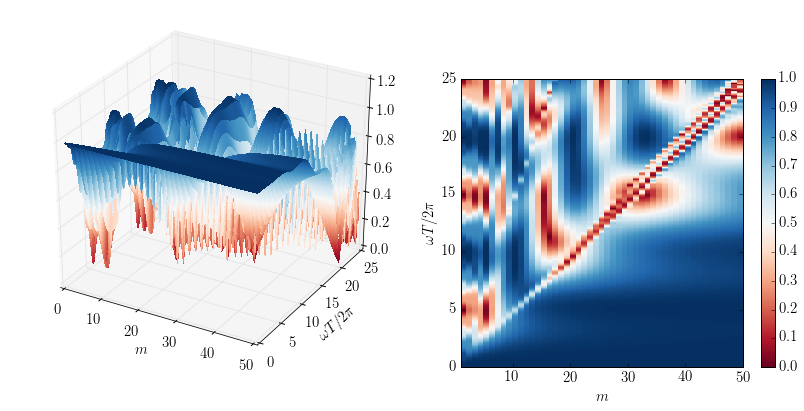

In [23]:
generate_maps(X, Y, Z)

In [24]:
T_m_list = np.arange(0, 2, 1e-2)

X, Y = np.meshgrid(m_list, T_m_list)
Z = np.zeros((len(T_m_list), len(m_list)))

for i1, m in enumerate(m_list):
    for i2, T_m in enumerate(T_m_list):
        T = m * T_m
        rho_af = U_a(H_list, T, m) * psi0
        rho_0f = U(H, T) * psi0
        Z[i2, i1] = fidelity(rho_af, rho_0f)

Figure index = 4 Time : 2015-07-23 14:39:14.927164


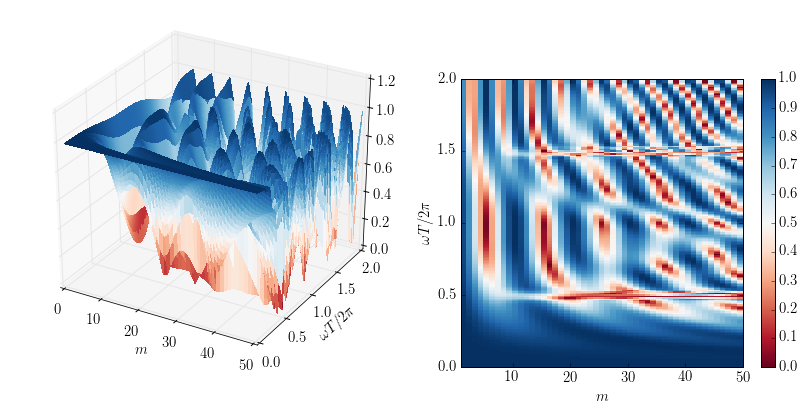

In [25]:
generate_maps(X, Y, Z)

## Decomposition into three parts

This time, we decompose the Rabi Hamiltonian into three parts which do not (apparently) commute with each other.

$$
\hat{H} = \hat{H}_0 + \hat{H}_1 + \hat{H}_2
$$

$$\hat{H}_0 = \frac{1}{2} \hbar \Omega \hat{\sigma}_z + \hbar \omega \hat{a}^\dagger \hat{a}\quad \textrm{(non-interacting Hamiltonian)},
\\\hat{H}_1 = \hbar g (\hat{\sigma}_+ \hat{a} + \hat{\sigma}_- \hat{a}^\dagger) \quad \textrm{(co-rotating interaction Hamiltonian)},
\\  \hat{H}_2 = \hbar g (\hat{\sigma}_+ \hat{a}^\dagger + \hat{\sigma}_- \hat{a})\quad\textrm{(counter-rotating interaction Hamiltonian)}
.$$

In [26]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into three parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * (a * sm.dag() + a.dag() * sm),
          g * (a.dag() * sm.dag() + a * sm)]
H = sum(H_list)

In [27]:
X, Y = np.meshgrid(m_list, T_list)
Z = np.zeros((len(T_list), len(m_list)))

for i1, m in enumerate(m_list):
    for i2, T in enumerate(T_list):
        rho_af = U_a(H_list, T, m) * psi0
        rho_0f = U(H, T) * psi0
        Z[i2, i1] = fidelity(rho_af, rho_0f)

Figure index = 5 Time : 2015-07-23 14:54:35.770791


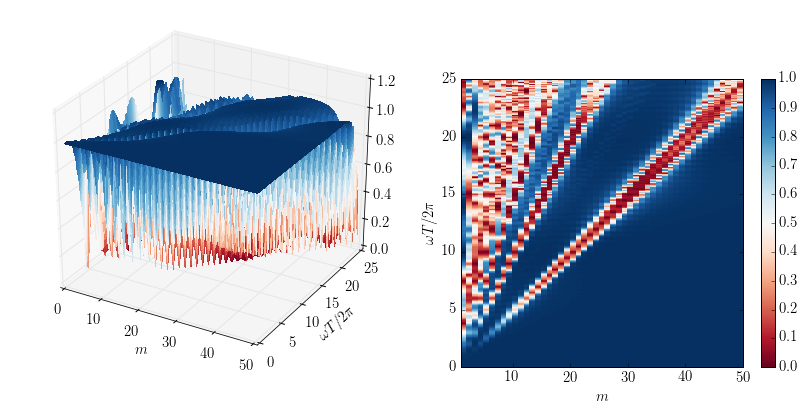

In [28]:
generate_maps(X, Y, Z)

### Dependence on the coupling strength $g$

Increasing coupling strength ($g = 0.1\omega$),

In [29]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.1 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into three parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * (a.dag() * sm.dag() + a * sm),
          g * (a * sm.dag() + a.dag() * sm)]

H = sum(H_list)

In [30]:
X, Y = np.meshgrid(m_list, T_list)
Z = np.zeros((len(T_list), len(m_list)))

for i1, m in enumerate(m_list):
    for i2, T in enumerate(T_list):
        rho_af = U_a(H_list, T, m) * psi0
        rho_0f = U(H, T) * psi0
        Z[i2, i1] = fidelity(rho_af, rho_0f)

Figure index = 6 Time : 2015-07-23 15:11:15.892250


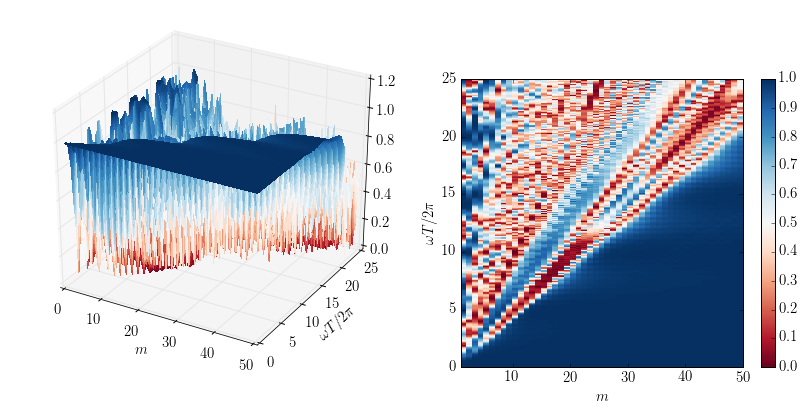

In [31]:
generate_maps(X, Y, Z)

Further increasing coupling strength ($g = 0.2\omega$),

In [32]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.2 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into three parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * (a.dag() * sm.dag() + a * sm),
          g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [33]:
X, Y = np.meshgrid(m_list, T_list)
Z = np.zeros((len(T_list), len(m_list)))

for i1, m in enumerate(m_list):
    for i2, T in enumerate(T_list):
        rho_af = U_a(H_list, T, m) * psi0
        rho_0f = U(H, T) * psi0
        Z[i2, i1] = fidelity(rho_af, rho_0f)

Figure index = 7 Time : 2015-07-23 15:30:15.079936


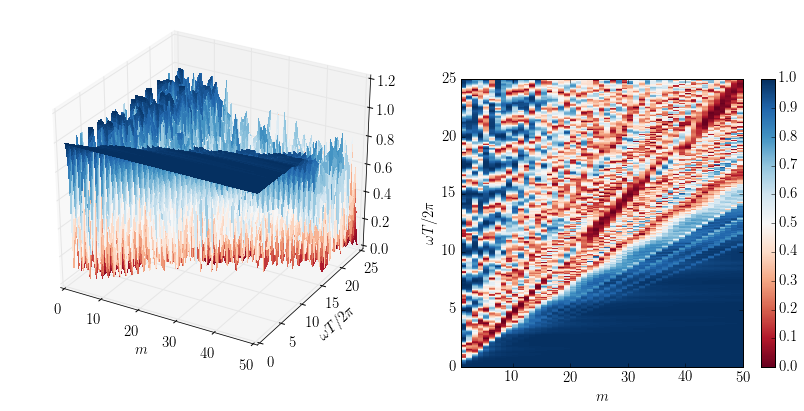

In [34]:
generate_maps(X, Y, Z)

Further increasing coupling strength ($g = 0.5\omega$),

In [35]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.5 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into three parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * (a.dag() * sm.dag() + a * sm),
          g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [36]:
X, Y = np.meshgrid(m_list, T_list)
Z = np.zeros((len(T_list), len(m_list)))

for i1, m in enumerate(m_list):
    for i2, T in enumerate(T_list):
        rho_af = U_a(H_list, T, m) * psi0
        rho_0f = U(H, T) * psi0
        Z[i2, i1] = fidelity(rho_af, rho_0f)

Figure index = 8 Time : 2015-07-23 15:47:36.837239


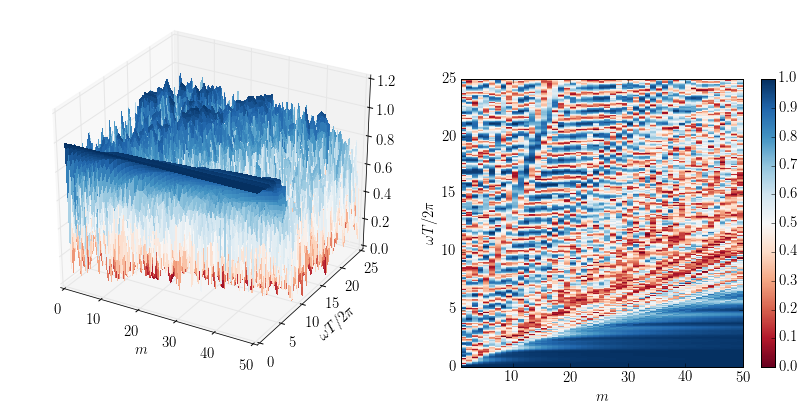

In [37]:
generate_maps(X, Y, Z)

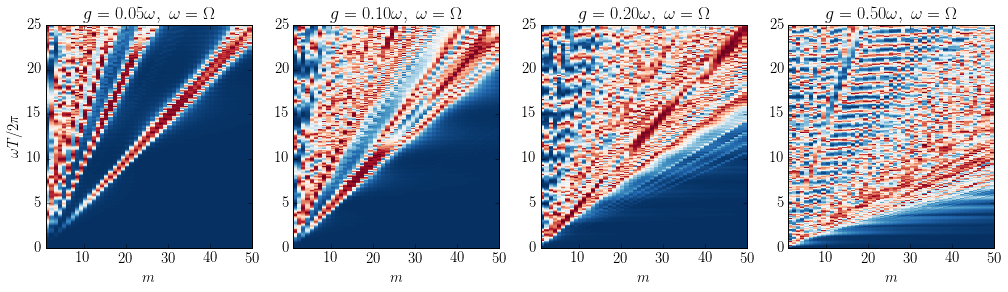

In [38]:
fig, axes = plt.subplots(1, 4, figsize = (17, 4))
g_list = [0.05, 0.1, 0.2, 0.5]
XX = X_list[4:8]; YY = Y_list[4:8]; ZZ = Z_list[4:8]

for idx, ax in enumerate(axes):
    ax.pcolor(XX[idx], YY[idx], ZZ[idx], cmap=cm.RdBu, vmin=0, vmax=1)
    ax.set_xlabel(r'$m$')
    ax.set_xlim([1, M])
    ax.set_title(r'$g = %.2f \omega,\ \omega = \Omega$' % g_list[idx])
axes[0].set_ylabel(r'$\omega T / 2\pi$');

Higher values of couplig strength $g$ requires higher values of fragmentation number $m$. This is due to the fact that the error in trotter approximation arises from non-commutativity of the partial Hamiltonians which scales linearly in $g$.

# Symmetric Decomposition

The generalized Trotter's formula can be symmetrized to the form of

$$
e^{\hat{A}_1 + \hat{A}_2 + \cdots + \hat{A}_p} = \lim_{m\rightarrow \infty} \left(e^{\hat{A}_1/2m}e^{\hat{A}_2/2m}\cdots e^{\hat{A}_{p-1}/2m}e^{\hat{A}_p/m}e^{\hat{A}_{p-1}/2m}\cdots e^{\hat{A}_2/2m} e^{\hat{A}_1/2m}\right)^m.
$$
This formula is known to have the correction of $m^{-2}$.

The advantage of using this <i>symmetrized</i> Trotter's formula is that the approximant converges faster than the unsymmetrized formula, with similar precision of pulsed Hamiltonians.

In [39]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into three parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * (a.dag() * sm.dag() + a * sm),
          g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [40]:
def U_a_sym(H_list, T, m):
    # symmetrized time-evolution approximant
    mult = 1
    for idx in range(len(H_list)):
        mult = ((-1j * H_list[-1-idx] * T / (2 * m)).expm() * mult
                * (-1j * H_list[-1-idx] * T / (2 * m)).expm())
    return mult ** m

In [41]:
X, Y = np.meshgrid(m_list, T_list)
Z = np.zeros((len(T_list), len(m_list)))

for i1, m in enumerate(m_list):
    for i2, T in enumerate(T_list):
        rho_af = U_a_sym(H_list, T, m) * psi0
        rho_0f = U(H, T) * psi0
        Z[i2, i1] = fidelity(rho_af, rho_0f)

Figure index = 9 Time : 2015-07-23 16:12:57.213757


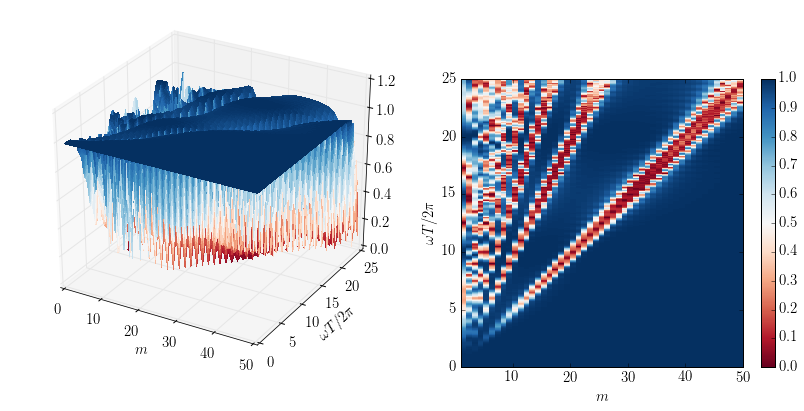

In [42]:
generate_maps(X, Y, Z)

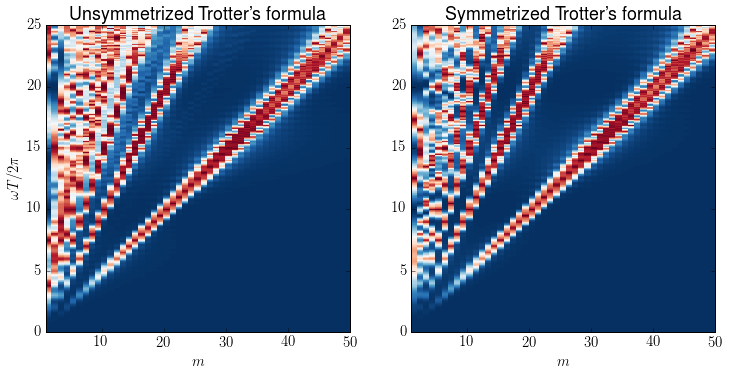

In [43]:
fig, axes = plt.subplots(1, 2, figsize = (12,5.5))
XX = [X_list[4], X_list[8]]
YY = [Y_list[4], Y_list[8]]
ZZ = [Z_list[4], Z_list[8]]

for idx, ax in enumerate(axes):
    p = ax.pcolor(XX[idx], YY[idx], ZZ[idx], cmap=cm.RdBu, vmin=0, vmax=1)
    ax.set_xlabel(r'$m$')
    ax.set_xlim([1, M])
axes[0].set_title(r"Unsymmetrized Trotter's formula")
axes[1].set_title(r"Symmetrized Trotter's formula")
axes[0].set_ylabel(r'$\omega T / 2\pi$');

Surprisingly, it hasn't changed much..

In [55]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.1 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into three parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * (a.dag() * sm.dag() + a * sm),
          g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [56]:
X, Y = np.meshgrid(m_list, T_list)
Z = np.zeros((len(T_list), len(m_list)))

for i1, m in enumerate(m_list):
    for i2, T in enumerate(T_list):
        rho_af = U_a_sym(H_list, T, m) * psi0
        rho_0f = U(H, T) * psi0
        Z[i2, i1] = fidelity(rho_af, rho_0f)

Figure index = 10 Time : 2015-07-24 17:18:04.846768


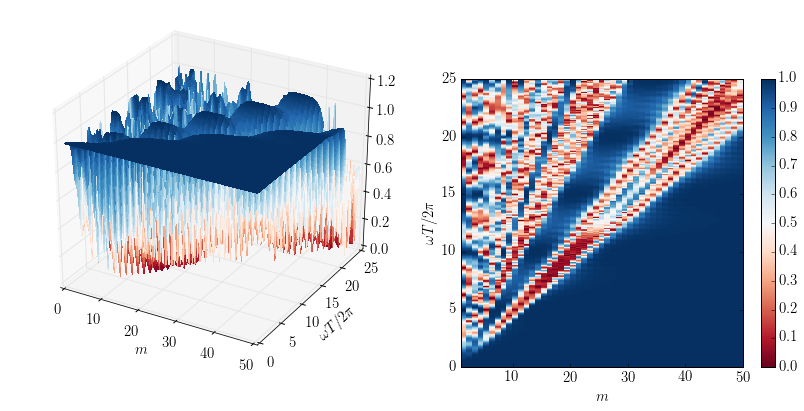

In [57]:
generate_maps(X, Y, Z)

In [58]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.2 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into three parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * (a.dag() * sm.dag() + a * sm),
          g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [59]:
X, Y = np.meshgrid(m_list, T_list)
Z = np.zeros((len(T_list), len(m_list)))

for i1, m in enumerate(m_list):
    for i2, T in enumerate(T_list):
        rho_af = U_a_sym(H_list, T, m) * psi0
        rho_0f = U(H, T) * psi0
        Z[i2, i1] = fidelity(rho_af, rho_0f)

Figure index = 11 Time : 2015-07-24 22:02:57.931259


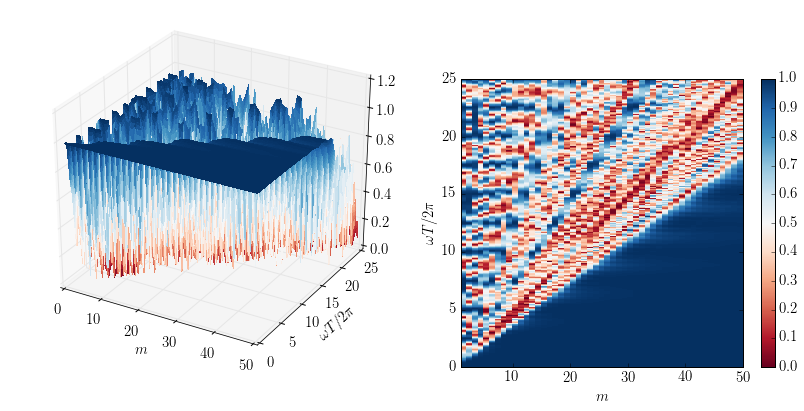

In [60]:
generate_maps(X, Y, Z)

In [61]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.5 * 2 * np.pi  # coupling strength

# Rabi Model Hamiltonian decomposed into three parts:
H_list = [wc * a.dag() * a + wa * sm.dag() * sm,
          g * (a.dag() * sm.dag() + a * sm),
          g * (a * sm.dag() + a.dag() * sm)]
H = sum(H_list)

In [62]:
X, Y = np.meshgrid(m_list, T_list)
Z = np.zeros((len(T_list), len(m_list)))

for i1, m in enumerate(m_list):
    for i2, T in enumerate(T_list):
        rho_af = U_a_sym(H_list, T, m) * psi0
        rho_0f = U(H, T) * psi0
        Z[i2, i1] = fidelity(rho_af, rho_0f)

Figure index = 12 Time : 2015-07-24 22:30:54.952382


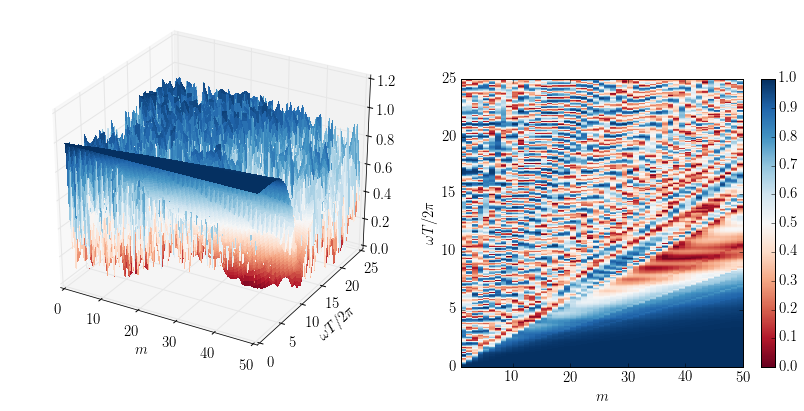

In [63]:
generate_maps(X, Y, Z)

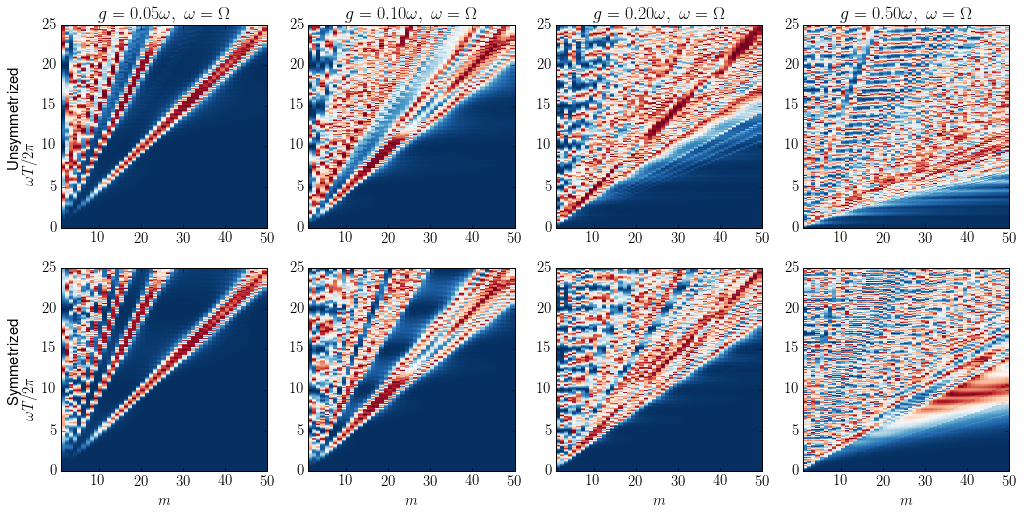

In [70]:
fig, axes = plt.subplots(2, 4, figsize = (17, 8))
g_list = [0.05, 0.1, 0.2, 0.5]
XX = [X_list[4:8], X_list[8:12]]
YY = [Y_list[4:8], Y_list[8:12]]
ZZ = [Z_list[4:8], Z_list[8:12]]

for i1 in range(2):
    for i2 in range(4):
        axes[i1,i2].pcolor(XX[i1][i2], YY[i1][i2], ZZ[i1][i2], cmap=cm.RdBu, vmin=0, vmax=1)
        axes[1,i2].set_xlabel(r'$m$')
        axes[i1,i2].set_xlim([1, M])
        axes[0,i2].set_title(r'$g = %.2f \omega,\ \omega = \Omega$' % g_list[i2])
axes[0,0].set_ylabel(r'Unsymmetrized\\ $\omega T / 2\pi$')
axes[1,0].set_ylabel(r'Symmetrized\\ $\omega T / 2\pi$');

As the coupling strength grows, the symmetrized Trotter's formula clearly shows faster convergence.

### References

[1] H. F. Trotter, <a href="http://www.ams.org/jourcgi/jour-getitem?pii=S0002-9939-1959-0108732-6">Proc. Amer. Math. Soc. <b>10</b>, 545 (1959)</a>.<br>
[2] M. Suzuki, <a href="http://link.springer.com/10.1007/BF01609348">Commun. Math. Phys. <b>51</b>, 183 (1976)</a>.<br>
[3] M. A. Nielsen and I. L. Chuang, <i>Quantum computation and quantum information</i>, Cambridge university press (2010).

## Version Information

In [44]:
from qutip.ipynbtools import version_table; version_table()